# 음성 데이터 탐색 (EDA)

## 데이터 준비
- 음성 길이 불러오기

In [2]:
with open('../raw_data/audio_lengths', 'r') as f:
    audio_length = [int(l.rstrip()) for l in f.readlines()]

print(audio_length[:5])

[126601, 75401, 92641, 93948, 84041]


## 기초통계

- max, min, mean 값 체크

In [16]:
print('MIN Length : %s, %.2fs'%(min(audio_length), min(audio_length)/16000))
print('MAX Length : %s, %.2fs'%(max(audio_length), max(audio_length)/16000))
print('MEAN Length : %.2f, %.2fs'%(sum(audio_length)/len(audio_length), sum(audio_length)/len(audio_length)/16000))

MIN Length : 0, 0.00s
MAX Length : 2144874, 134.05s
MEAN Length : 79698.17, 4.98s


In [18]:
# 구간별로 묶어서 개수로 plotting
interval = 20000

length_dict = {i: [] for i in range(max(audio_length)//interval + 1)}

for al in audio_length:
    length_dict[al//interval].append(al)

length_count = []
for k in length_dict:
    length_count.append(len(length_dict[k]))

## 시각화

- 히스토그램

In [19]:
# import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

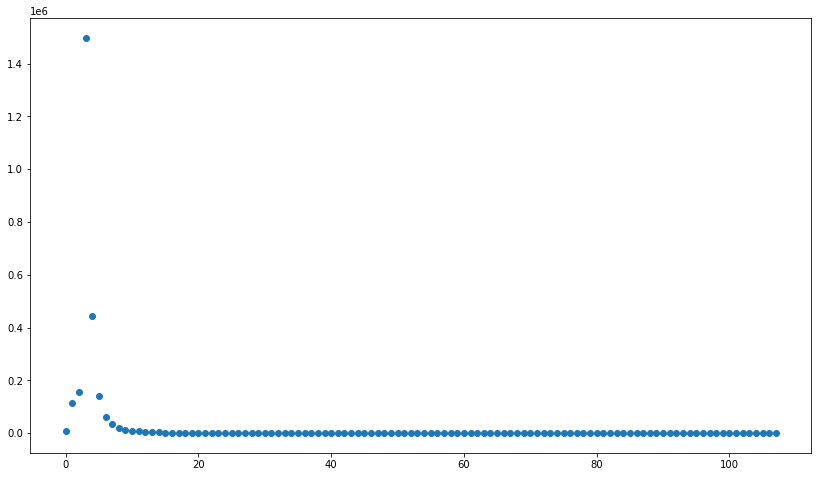

In [20]:
plt.rcParams['figure.figsize'] = (14,8)

plt.scatter(range(len(length_count)), length_count)

Text(0, 0.5, 'audio file count')

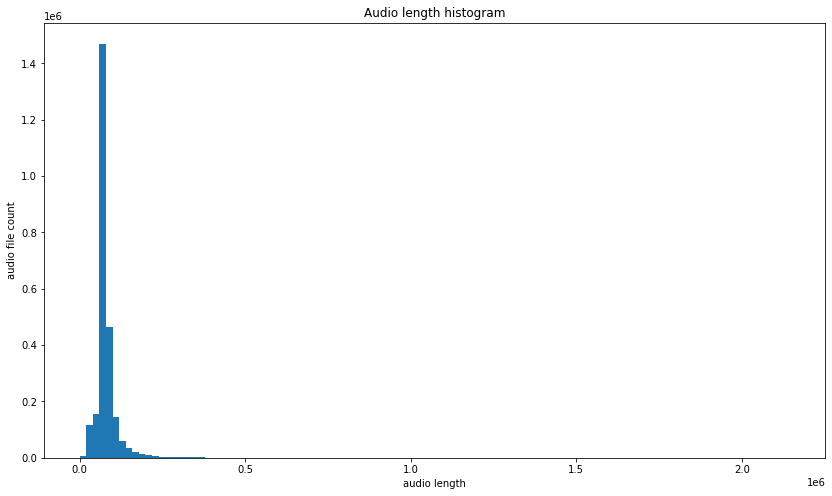

In [21]:
plt.hist(np.array(audio_length), bins=108)
plt.title('Audio length histogram')
plt.xlabel('audio length')
plt.ylabel('audio file count')

(0.0, 400000.0)

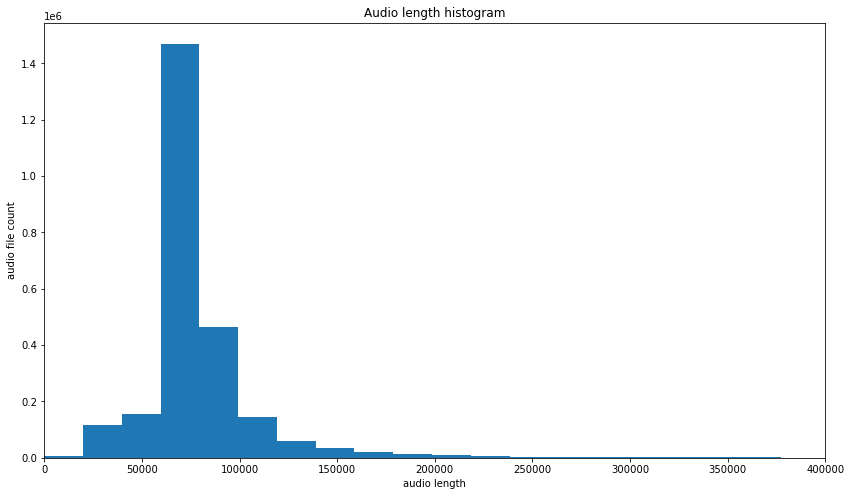

In [23]:
# 0 ~ 400000까지만 잘라서 보기
plt.hist(np.array(audio_length), bins=108)
plt.title('Audio length histogram')
plt.xlabel('audio length')
plt.ylabel('audio file count')
plt.xlim(0, 400000)

## 결론

- 오디오 길이 제한
- 라벨 별 사용가능한 오디오 개수 확인
- 사용가능한 오디오 파일만 별도로 저장

In [ ]:
# 기존 사용가능한 오디오 데이터 불러오기 (audio_path, label)
with open('../raw_data/usable_audios', 'r') as f:
    audio_datas = [l.rstrip().split('\t') for l in f.readlines()]

# audio_length 추가
for i in range(len(audio_datas)):
    audio_datas[i].append(audio_length[i])

In [ ]:
# 10초 이상의 오디오 파일은 걸러냄
filter_audio_datas = list(filter(lambda x: x[2] < 160000, audio_datas))
print('최종 사용할 음성 파일 개수 : %s'%len(filter_audio_datas))
print('제거된 음성 파일 개수 %s'%(len(audio_datas) - len(filter_audio_datas)))

In [ ]:
label_counter = {       # 라벨링 데이터 - (1: 서울,경기, 2: 강원, 3: 충청, 4: 경상, 5: 전라, 6: 제주, 9: 기타)
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0, 
    6: 0,                    
    9: 0
}
for _, label, _ in filter_audio_datas:
    label_counter[int(label)]+=1

MIN_AUDIO_LENGTH = min(list(label_counter.values())[:-1])
MIN_AUDIO_LENGTH

print(label_counter)
print(MIN_AUDIO_LENGTH)

In [ ]:
filter_usable_audios = []
for i in range(len(filter_audio_datas)):
    filter_usable_audios.append('\t'.join(map(str, filter_audio_datas[i])))

with open('../raw_data/filter_usable_audios', 'w', encoding='utf-8') as f:
    f.write('\n'.join(filter_usable_audios))